# Monte Carlo Option Pricing Simulator

This notebook simulates and prices a European call option using Monte Carlo methods.  
We model the stock price using Geometric Brownian Motion and compute the expected payoff.  
This project is a self-contained exploration of uncertainty, simulation, and pricing logic in quantitative finance.

## 2. Math Background

**Stock price evolution (GBM):**

$$
S_t = S_0 \cdot \exp\left[\left(\mu - \frac{\sigma^2}{2}\right)t + \sigma W_t\right]
$$

**Where:**

- $S_0$: Initial stock price  
- $\mu$: Expected return (drift)  
- $\sigma$: Volatility  
- $W_t$: Brownian motion simulated by cumulative normal steps  

---

**Call Option Payoff:**

$$
\text{Payoff} = \max(S_T - K, 0)
$$

---

**Monte Carlo Approximation:**

$$
\mathbb{E}[\text{Payoff}] \approx \frac{1}{N} \sum_{i=1}^{N} \max(S_T^{(i)} - K, 0)
$$

---

**Discounting:**

$$
\text{Option Price} = e^{-rT} \cdot \mathbb{E}[\text{Payoff}]
$$

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

S0 = 100     # Initial stock price
K = 105      # Strike price
T = 1        # Time to maturity (in years)
mu = 0.1     # Expected return
sigma = 0.2  # Volatility
r = 0.05     # Risk-free rate
N = 1000     # Time steps
M = 1000     # Simulations

dt = T / N

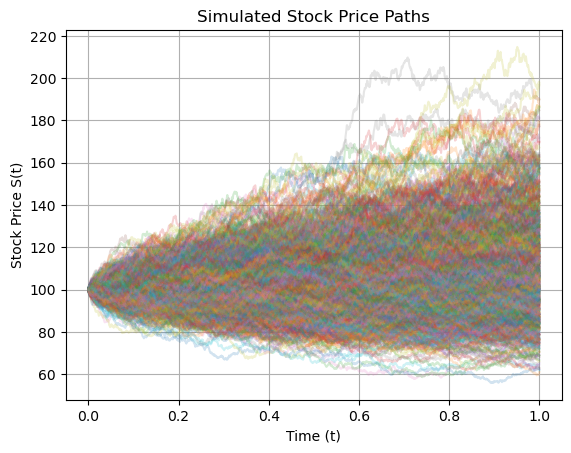

In [10]:
t = np.linspace(0, T, N+1)
final_prices = []

for _ in range(M):
    W = np.zeros(N+1)
    W[1:] = np.cumsum(np.random.normal(0, np.sqrt(dt), size=N))
    S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)
    final_prices.append(S[-1])
    plt.plot(t, S, alpha=0.2)

plt.title("Simulated Stock Price Paths")
plt.xlabel("Time (t)")
plt.ylabel("Stock Price S(t)")
plt.grid(True)
plt.show()


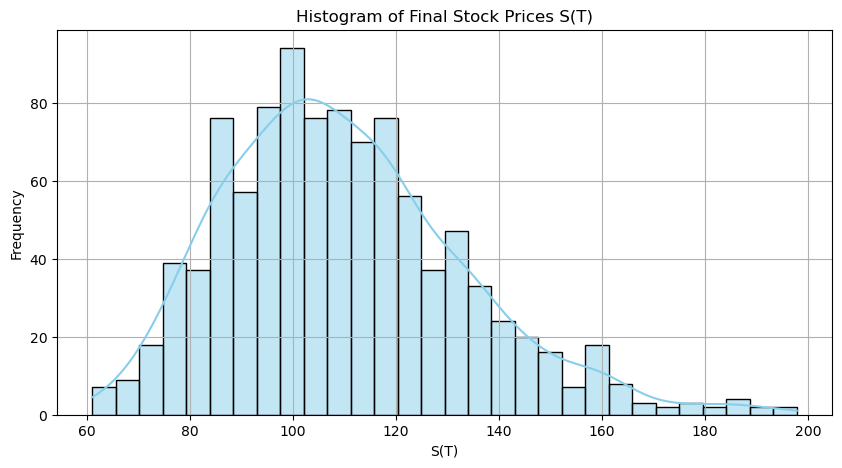

In [11]:
final_prices = np.array(final_prices)
plt.figure(figsize=(10,5))
sns.histplot(final_prices, bins=30, kde=True, color='skyblue')
plt.title("Histogram of Final Stock Prices S(T)")
plt.xlabel("S(T)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [12]:
payoffs = np.maximum(final_prices - K, 0)
expected_payoff = np.mean(payoffs)
option_price = np.exp(-r * T) * expected_payoff

print(f"Estimated Option Price: ₹{option_price:.2f}")

Estimated Option Price: ₹10.93


## Conclusion

- Simulated GBM paths show realistic uncertainty in stock behavior.
- The expected value of the option payoff, discounted to today, gives the fair price.
- This approach reflects real-world probabilistic pricing methods used in finance.
- Future work: Black-Scholes comparison, visualizing Greeks, Streamlit interface for parameters.

## 💡 Code Parameters and Option Logic

**What is a Call Option?**  
A call option is a financial contract that gives you the *right (not obligation)* to buy a stock at a fixed price (called the **strike price**) on a future date.

In this simulation:
- **( K )**: Strike Price — the price agreed in the option contract 
- **( $S_0$ )**: Initial stock price — what the stock is worth today
- **\( T \)**: Time to maturity — how long the contract lasts (e.g., 1 year)
- **\( $\mu$ \)**: Expected return — average growth rate of the stock
- **($ \sigma $)**: Volatility — how unpredictable the stock price is
- **\( r \)**: Risk-free interest rate — used to discount future values

We:
1. Simulate thousands of possible future stock prices using GBM.
2. For each simulation, calculate the profit from the option:
   $$
   \max(S_T - K, 0)
   $$
   If the stock ends up above the strike, we gain. If not, the option is worthless.
3. Average all the payoffs and discount to present using:
   $$
   e^{-rT} \cdot \text{Expected Payoff}
   $$

The result is the *fair price* of the option — how much you should pay today for this future right.

This project helped me connect core mathematical ideas like randomness, expectation, and exponential decay with real-world financial reasoning.

## 📘 Mathematical Intuition and Reasoning

Real-world stock prices are unpredictable and noisy — there's no clean equation to predict them exactly.  
But what we *can* do is model the **uncertainty** using mathematics — and that’s where Brownian Motion comes in.

- **Brownian Motion** models pure randomness. It mimics how particles move in a fluid — or how stock prices fluctuate.
- **Geometric Brownian Motion (GBM)** is used because stock prices can't be negative. GBM keeps prices positive by exponentiating the Brownian path.
- The formula:  
  $$
  S_t = S_0 \cdot \exp\left[\left(\mu - \frac{\sigma^2}{2}\right)t + \sigma W_t\right]
  $$
  combines average growth ($\mu$) and randomness ($\sigma W_t$).

We simulate many such future paths (Monte Carlo) and calculate the expected profit from an option.

We **discount** this expected payoff because money in the future is worth less today.  
The formula  ($ e^{-rT}$) adjusts for that, using the **risk-free rate**.

So instead of predicting the future price, we simulate *many possible futures*, and take their average payoff.  
This is the core of Monte Carlo pricing: modeling uncertainty through simulation.